(8950, 17)
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2     

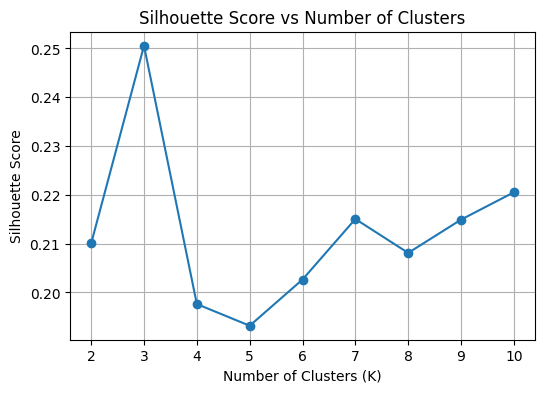

Optimal number of clusters: 3


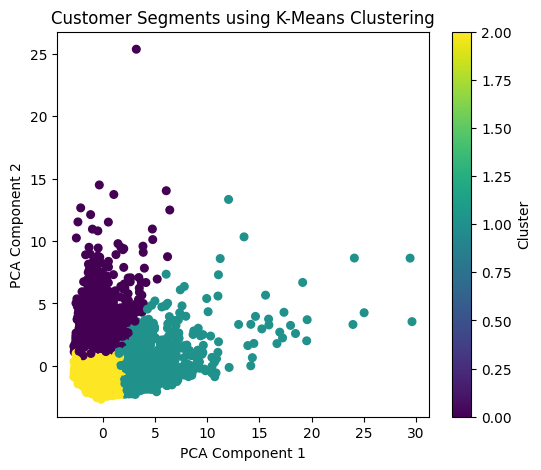

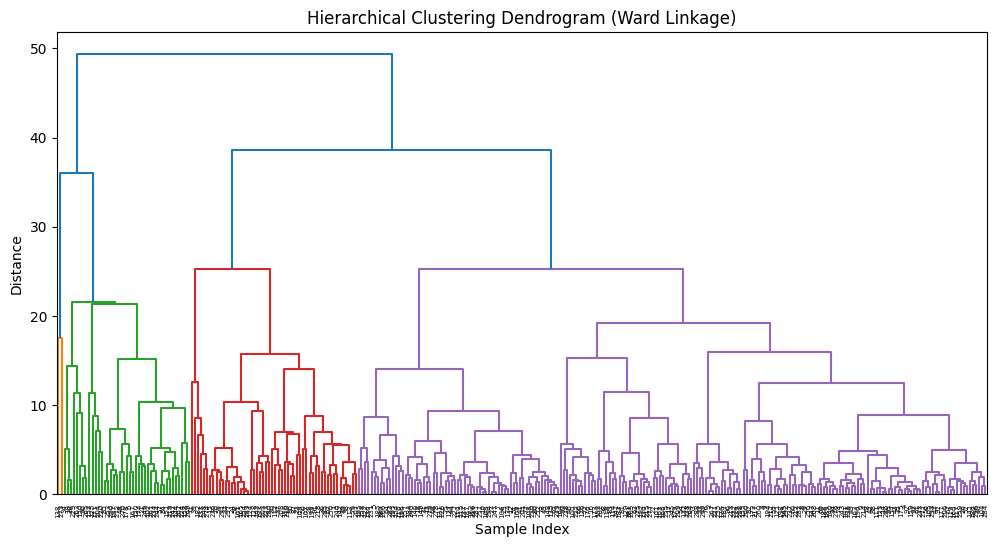

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage
df = pd.read_csv("dataset.csv")
df.columns = df.columns.str.strip()

# Drop ID column
df = df.drop('CUST_ID', axis=1)

# Handle missing values
df = df.fillna(df.mean())

print(df.shape)
print(df.head())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()
optimal_k = K_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_k)


kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=30
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments using K-Means Clustering")
plt.colorbar(scatter, label="Cluster")
plt.show()
# Use a subset for dendrogram readability
sample_data = X_scaled[:300]

linked = linkage(sample_data, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


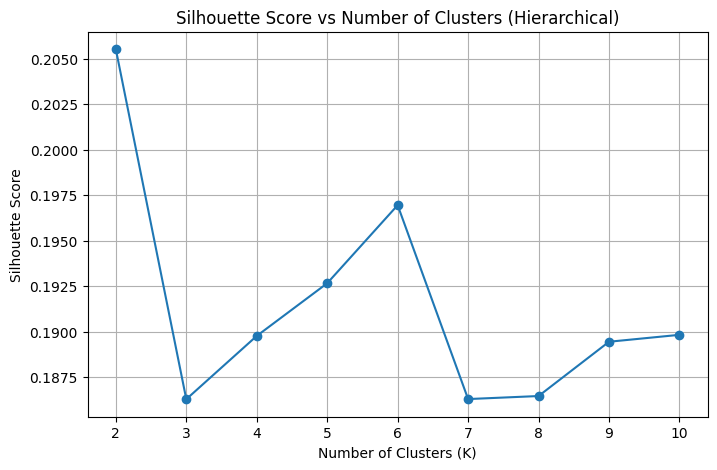

Best Number of Clusters: 2
Best Silhouette Score: 0.2055


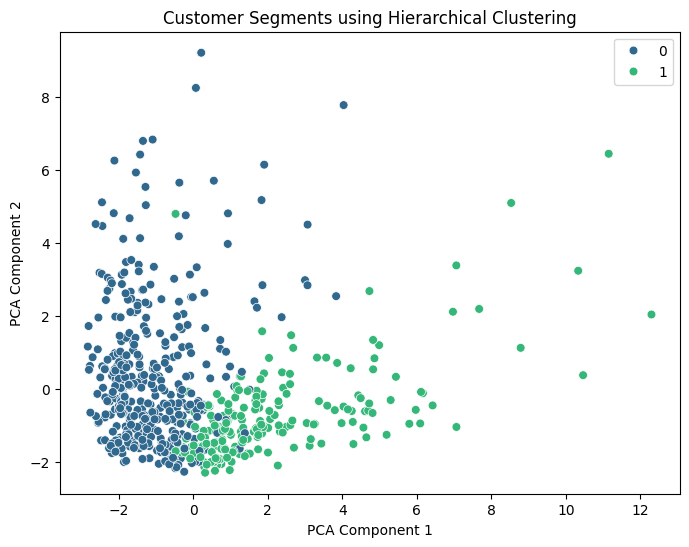

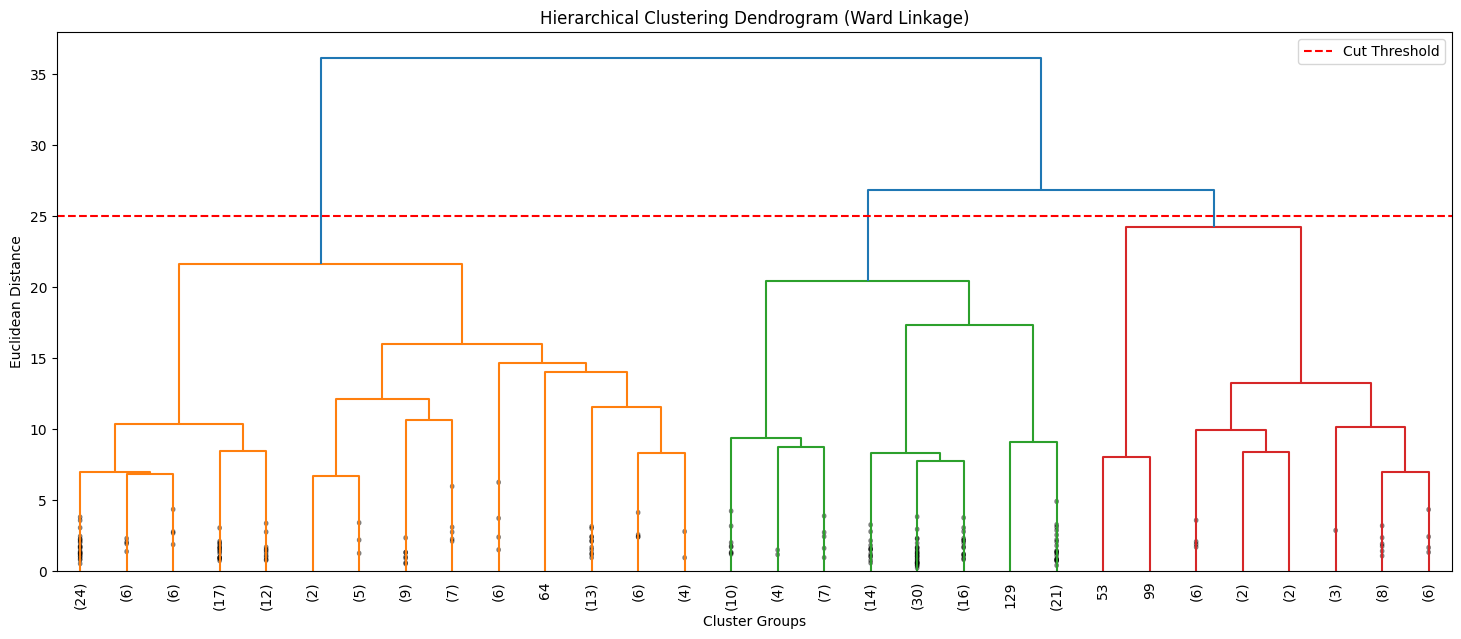

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("dataset.csv")

# Drop customer ID
df = df.drop(columns=['CUST_ID'], errors='ignore')

# Handle missing values
df.fillna(df.mean(), inplace=True)

df_sample = df.sample(n=600, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

cluster_range = range(2, 11)
silhouette_scores = []

for k in cluster_range:
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette vs K
plt.figure(figsize=(8,5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (Hierarchical)")
plt.grid(True)
plt.show()

best_k = cluster_range[np.argmax(silhouette_scores)]
print("Best Number of Clusters:", best_k)
print("Best Silhouette Score:", round(max(silhouette_scores), 4))

hc = AgglomerativeClustering(
    n_clusters=best_k,
    linkage='ward'
)

final_labels = hc.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=final_labels,
    palette='viridis',
    s=40,
    legend='full'
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments using Hierarchical Clustering")
plt.show()

linked = linkage(X_scaled[:250], method='ward')

plt.figure(figsize=(18,7))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)
plt.axhline(y=25, color='red', linestyle='--', label='Cut Threshold')
plt.xlabel("Cluster Groups")
plt.ylabel("Euclidean Distance")
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.legend()
plt.show()
